In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns



In [3]:
fire_data = pd.read_csv("Fire.csv")
fire_data.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


Text(0.5, 1.0, 'Correlation Heatmap')

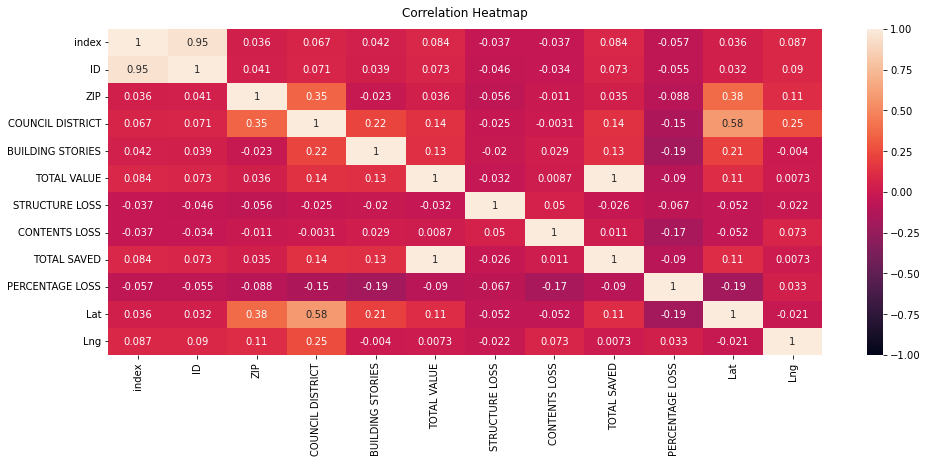

In [9]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(fire_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [4]:
fire_data.describe()

,index,ID,ZIP,COUNCIL DISTRICT,BUILDING STORIES,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,Lat,Lng
count,621.000000,620.000000,618.000000,594.000000,621.000000,6.210000e+02,6.210000e+02,6.210000e+02,6.210000e+02,621.000000,621.000000,621.000000
mean,310.000000,17878.674194,75225.291262,7.156566,1.749597,6.830368e+06,-3.205506e+04,-8.647665e+03,6.789665e+06,11.013011,32.798053,-96.783068
std,179.411538,394.536669,20.112309,3.673073,1.612108,4.231329e+07,2.240636e+05,6.566641e+04,4.230744e+07,18.784545,0.089979,0.072806
min,0.000000,16308.000000,75019.000000,1.000000,1.000000,5.000000e+02,-5.000000e+06,-1.500000e+06,2.000000e+02,0.000000,32.636369,-96.987656
25%,155.000000,17475.750000,75214.250000,4.000000,1.000000,9.628000e+04,-2.000000e+04,-2.500000e+03,7.800000e+04,0.080000,32.726157,-96.836984
50%,310.000000,17964.500000,75223.000000,7.000000,1.000000,2.500000e+05,-4.000000e+03,-7.500000e+01,2.189750e+05,1.110000,32.782945,-96.785033
75%,465.000000,18232.250000,75237.000000,10.000000,2.000000,3.218860e+06,-5.000000e+02,0.000000e+00,3.084300e+06,12.110000,32.867143,-96.740262
max,620.000000,18514.000000,75287.000000,14.000000,26.000000,7.265000e+08,0.000000e+00,0.000000e+00,7.264997e+08,94.580000,33.011212,-96.567056
